 # Modeling the swelling behavior of a hypromellulose-based pharmaceutical formulation


In [1]:
import numpy as np
from numpy import array
from diffusionpy import Diffusion_MS,D_Matrix,Diffusion_MS_iter,vpure,dlnai_dlnxi_loop,circular,origin_like
import matplotlib.pyplot as plt

We import the experimental data from https://doi.org/10.1016/s0168-3659(99)00104-2

In [2]:

swelling_data=array([[0.       ,    0.    ],
       [  9.24861,   0.895  ],
       [ 11.18739,   1.08754],
       [ 16.86526,   1.2824 ],
       [ 32.37552,   1.54222],
       [ 63.25758,   2.15696],
       [121.14411,   2.80418],
       [152.02616,   3.06168],
       [182.76973,   3.28902],
       [211.713  ,   3.51403],
       [242.59505,   3.8388 ],
       [271.53832,   4.00119],
       [302.42037,   4.25869],
       [333.30242,   4.38859],
       [360.3069 ,   4.61593],
       [420.13222,   5.06829],
       [451.01427,   5.13324],
       [483.83511,   5.35826]])

minutes_exp=swelling_data[:,0]
thickness_millis=swelling_data[:,1]
wv0=0.01
wv8=0.99

dl0vec=np.asarray([0.1,0.2,0.3,0.4,0.6,0.8])

def limits(dl0,wv0,wv8):
       wi0=np.asarray([(1-wv0)*(1-dl0),(1-wv0)*dl0,wv0])
       wi8=np.asarray([(1-wv8)*(1-dl0),(1-wv8)*dl0,wv8])
       return wi0,wi8


We wan to model this particular behavior

 We want to describe the water sorption and dissolution of this formulation. The formulation consists of three components: the hypromellulose (hpmc) which is the polymer, the buflomedil pyridoxal phosphate (bpp) as an API and water. First we define starting and equilibrium weight fractions.

In [3]:
nc=3
L=6/1000

Dvec=np.asarray([7E-9,7E-9,7E-9])

Mi=np.asarray([86000,554.5,18.015])
nt=300
t=np.linspace(0,minutes_exp[-1],nt)*60
mobile=np.asarray([False,False,True])

EJ=np.asarray([4E8])
etaJ=np.asarray([5.5E12])
exponent=np.asarray([0.])
# Density of BPP  1394 kg/m3 at 37 C via Helium Pycnometry https://doi.org/10.1016/s0168-3659(99)00104-2
# Water solubility of BPP  0.65 kg/l  https://doi.org/10.1016/s0168-3659(99)00104-2



In [4]:
T=298.15
p=1E5
kij=D_Matrix(np.asarray([0,0,0]),nc)
par={"mi":np.asarray([4136.278, 14.283,1.20469]),
"si": np.asarray([2.889, 3.535,2.797059952]),
"ui" :np.asarray([298.047, 262.79,353.95]),
"eAi" :np.asarray([0., 886.4,2425.67]),
"kAi":np.asarray([0.02, 0.02,0.04509]),
"NAi":np.asarray([525., 3.,1.]),
"Mi": Mi,
"kij":kij,
"kijA":np.asarray([[0.]])}

vpures=vpure(p,T,**par)
par["vpure"]=vpures
dlnai_dlnwi_fun=lambda wi: dlnai_dlnxi_loop(T,wi,**par)

 We can determine the mass dissolved in the dissolution medium by quantifying the mass that leaves the ASD. The initial mass of the ASD and the mass of the dissolution medium must be known

 We plot the results

------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 3.3683547 seconds ----------------
------------- Initialization and postprocessing took 0.0129297 seconds----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.2466 seconds ----------------
------------- Initialization and postprocessing took 0.0133776 seconds----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.2685792 seconds ----------------
------------- Initialization and postprocessing took 0.0121862 seconds----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0

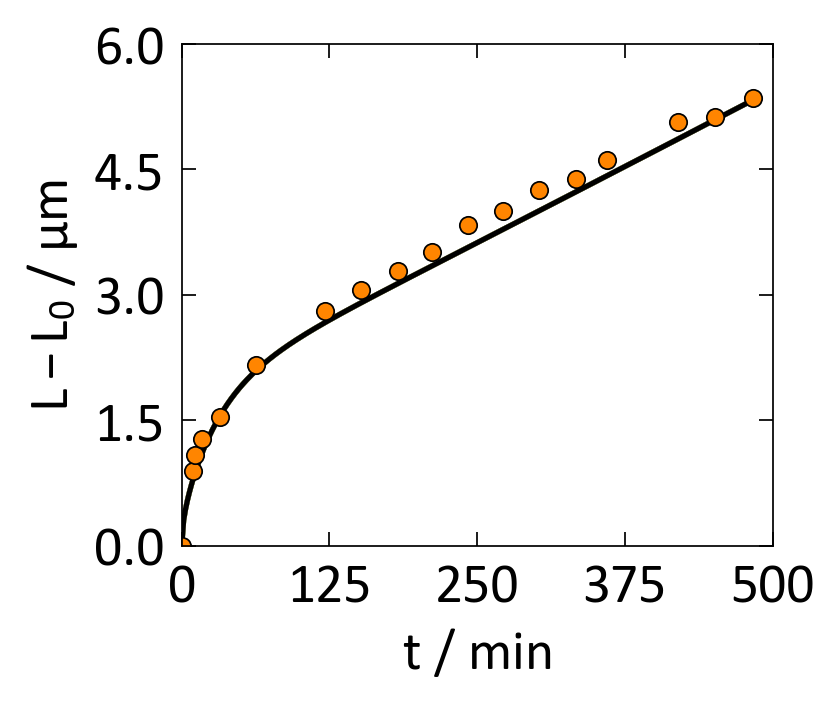

In [5]:

wtz_list=[]
fig, ax = origin_like.subplots()
origin_like.set_xlabel(ax,"t", "min")
origin_like.set_ylabel(ax,"L-L_0", "µm")
origin_like.set_ticks(ax,0,500,0,6)

lines=["r-","c-","g-","b-","y-","k-"]
i=0
for dl0 in dl0vec:
    wi0,wi8=limits(dl0,wv0,wv8)
    # wt,wtz,zvec,Lt,sigma=Diffusion_MS_iter(t,L,Dvec,wi0,wi8,Mi,mobile,dlnai_dlnwi=dlnai_dlnxi_loop,swelling=True,full_output=True,nz=20)
    wt,wtz,zvec,Lt,sigma=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile,swelling=True,full_output=True,nz=20,EJ=EJ,etaJ=etaJ,exponent=exponent)
    origin_like.plot(ax,t/60,(Lt-L)*1000, lines[i]) 
    i+=1
    
origin_like.plot(ax,minutes_exp,thickness_millis, "ro")
